## 6.4 Introduction to SQL

* In a business setting, most data may not be stored in text or Excel files. <br>
<br>
* SQL-based relational databases (such as SQL Server, PostgreSQL, and MySQL) are in wide use. 
  * An abbreviation for **Structured Query Language**. 
  * SQL is a language designed specifically for communicating with databases. 
  * Our course focuses on **SQLite** and uses the Python's built-in ```sqlite3``` driver.

In [1]:
import sqlite3
import pandas as pd

Let's use the Python's built-in ```sqlite3``` to build a database of HK firms' value signals. 

In [2]:
D = pd.read_parquet('data/HK_stocks_151signals.parquet', engine='pyarrow')
D['key'] = D.index

identifier_var_list = ['key', 'id', 'eom', 'ret_exc_lead1m']

### Value signals: You have probably heard of value stocks. At this moment, you don't need to know 
###                the exact definitions of the following variables. 
value_list = ['key', 'id', 'eom', 'at_me', 'be_me', 'bev_mev', 'chcsho_12m', 'debt_me', 'div12m_me', 
              'eqnetis_at', 'eqnpo_12m', 'eqnpo_me', 'eqpo_me', 'fcf_me', 'ival_me', 'netis_at', 'ni_me',
              'ocf_me', 'sale_me', 'ebitda_mev', 'eq_dur']

### Momentum signals:
momentum_list = ['key', 'id', 'eom', 'prc_highprc_252d', 'resff3_6_1', 'resff3_12_1', 'ret_3_1', 'ret_6_1', 
                 'ret_9_1', 'ret_12_1', 'seas_1_1na']

### Create a database ```hk_stocks.db```

In [3]:
conn = sqlite3.connect('data/hk_stocks.db')

In [4]:
D[identifier_var_list].to_sql('stock_returns', conn, if_exists='replace', index=False)
D[value_list].to_sql('value_signals', conn, if_exists='replace', index=False)
D[momentum_list].to_sql('momentum_signals', conn, if_exists='replace', index=False)

413279

In [5]:
conn.close()   # Don't forget to close the connection!

---

### 6.4.1 Database Basics

**Definition**: A container (usually a ***set of files***) to store organized data.

**Tables** 
* They are structured files that can store data of specific types, such as 'stock_returns' and 'value_signals' in 'hk_stocks.db'.  <br>
<br>

**Columns and Datatypes**
* Tables are made up of columns. A column contains a particular piece of information within a table.
* Each column in a database has an associated datatype. A datatype defines what type of data the column can contain. For example, if the column were to contain stock returns, the datatype would be a numeric datatype. <br>
<br>

**Rows**
* A record in a table, e.g., the stock-month observation. <br>
<br>

**Primary Keys**
* Every row in a table should have some column (or set of columns) that uniquely identifies it.
* Any column in a table can be established as the primary key, as long as it meets the following conditions:
  * No two rows can have the same primary key value.
  * Every row must have a primary key value. (Primary key columns may not allow NULL values.)
  * Values in primary key columns should never be modified or updated.
  * Primary key values should never be reused. (If a row is deleted from its primary key may not be assigned to any new rows in the future.)
* Multiple columns may be used together as a primary key. 
  * When multiple columns are used, the rules listed above must apply to all columns. 
* Tip: Always Define Primary Keys. Although primary keys are not actually required, most database designers ensure that every table they create has a primary key so that future data manipulation is possible and manageable. 

---

### 6.4.2 Retrieving Data

**The ```SELECT``` Statement**
* To use SELECT to retrieve table data you must, at a minimum, specify two pieces of information
  * (1) what you want to select (the variable names)
  * (2) from where you want to select it (the table names).
* The desired column name is specified right after the ```SELECT``` keyword, and the ```FROM``` keyword specifies the name of the table from which to retrieve the data.

**Tip: Terminating Statements**
* Multiple SQL statements must be separated by semicolons (the ```;``` character). 

**Tip: Take Care with Commas**
* When selecting multiple columns be sure to specify a comma between each column name, ***but not after the last column name***. 


#### First, we need to create a connection to the local database file
* In order to execute SQL statements and fetch results from SQL queries, we will need to use a **database cursor**.

In [6]:
conn = sqlite3.connect('data/hk_stocks.db')
c = conn.cursor()

In [7]:
query = """
PRAGMA table_info('stock_returns')  -- Get the table information
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ret_exc_lead1m', 'REAL', 0, None, 0)]

#### We use the method ```c.execute(query)``` to query the data. 
* The SQL commands are grouped by docstrings (```""" """```), which are highly recommended. 
* If your SQL commands are on one line, you can instead use (```" "```).

In [8]:
query = """
SELECT key, id, eom, be_me
FROM value_signals;
"""

bm_ratio = c.execute(query)

#### We use the ```fetchone``` method to get one line of the output (the query returns a tuple)

In [9]:
for ii in range(5):
    print(bm_ratio.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913)
(13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034)


**Tip: Use of White Space**

All extra white space within a SQL statement is ignored when that statement is processed. SQL statements can be specified on one long line or broken up over many lines. So, the following statements are functionality identical:

In [10]:
query = """
SELECT 
key, id, eom, be_me
FROM 
value_signals;
"""
## Here we retrieve multiple columns, so the variable names are seperated by ","
bm_ratio = c.execute(query)

for ii in range(5):
    print(bm_ratio.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913)
(13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034)


In [11]:
query = """
SELECT key, id, eom, be_me FROM value_signals;
"""
bm_ratio = c.execute(query)

for ii in range(5):
    print(bm_ratio.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913)
(13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034)


**Retrieving All Columns**

* ```SELECT``` statements can also request all columns without having to list them individually. 
* This is done using the asterisk (```*```).

In [12]:
query = """
SELECT *
FROM stock_returns;
"""

stock_returns = c.execute(query)

for ii in range(5):
    print(stock_returns.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', -0.09400676194570491)
(13581257, 310108801.0, '1990-08-31 00:00:00', -0.14569978347999013)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.15107615827555618)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.017782245901352873)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.020162740476097583)


**Retrieving Distinct Rows**

* Suppose that you want to retrieve a list of distinct 'eom'. 
* The solution is to use the ```DISTINCT``` keyword which instructs the database to only return distinct values.
  * The ```DISTINCT``` keyword must be placed directly in front of the column names.

In [13]:
query = """
SELECT DISTINCT eom 
FROM stock_returns;
"""

eom_stocks = c.execute(query)

eom_stocks.fetchall()

[('1990-07-31 00:00:00',),
 ('1990-08-31 00:00:00',),
 ('1990-09-30 00:00:00',),
 ('1990-10-31 00:00:00',),
 ('1990-11-30 00:00:00',),
 ('1990-12-31 00:00:00',),
 ('1991-01-31 00:00:00',),
 ('1991-02-28 00:00:00',),
 ('1991-03-31 00:00:00',),
 ('1991-04-30 00:00:00',),
 ('1991-05-31 00:00:00',),
 ('1991-06-30 00:00:00',),
 ('1991-07-31 00:00:00',),
 ('1991-08-31 00:00:00',),
 ('1991-09-30 00:00:00',),
 ('1991-10-31 00:00:00',),
 ('1991-11-30 00:00:00',),
 ('1991-12-31 00:00:00',),
 ('1992-01-31 00:00:00',),
 ('1992-02-29 00:00:00',),
 ('1992-03-31 00:00:00',),
 ('1992-04-30 00:00:00',),
 ('1992-05-31 00:00:00',),
 ('1992-06-30 00:00:00',),
 ('1992-07-31 00:00:00',),
 ('1992-08-31 00:00:00',),
 ('1992-09-30 00:00:00',),
 ('1992-10-31 00:00:00',),
 ('1992-11-30 00:00:00',),
 ('1992-12-31 00:00:00',),
 ('1993-01-31 00:00:00',),
 ('1993-02-28 00:00:00',),
 ('1993-03-31 00:00:00',),
 ('1993-04-30 00:00:00',),
 ('1993-05-31 00:00:00',),
 ('1993-06-30 00:00:00',),
 ('1993-07-31 00:00:00',),
 

**Limiting Results**

* What if you want to return just the first row or a set number of rows?
* In SQLite, we can use the ```LIMIT``` clause, after the ```FROM``` clause. 

In [14]:
query = """
SELECT key, id, eom, be_me 
FROM value_signals
LIMIT 5;
"""
bm_ratio = c.execute(query)

bm_ratio.fetchall()

[(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913),
 (13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185),
 (13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002),
 (13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562),
 (13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034)]

In [15]:
### "LIMIT 5 OFFSET 5" means that we want to retrieve five rows starting from row 5.
### The first number is where to start, and the second is the number of rows to retrieve. 
### Anything between /* and */ (and after --) is comment text. 
query = """
/* Comments: We want to select several columns */
SELECT key, id, eom, be_me 
FROM value_signals
LIMIT 5 OFFSET 5;  -- Comments: The first number is where to start. The second is the number of rows to retrieve.
"""
bm_ratio = c.execute(query)

bm_ratio.fetchall()

[(13581261, 310108801.0, '1990-12-31 00:00:00', 0.5855084837999145),
 (13581262, 310108801.0, '1991-01-31 00:00:00', 0.5270208298761084),
 (13581263, 310108801.0, '1991-02-28 00:00:00', 0.5028971434512038),
 (13581264, 310108801.0, '1991-03-31 00:00:00', 0.4103099817587193),
 (13581265, 310108801.0, '1991-04-30 00:00:00', 0.4885601937712942)]

**Caution: Row 0**
* The first row retrieved is row 0, not row 1. 
* ```LIMIT 1 OFFSET 1``` will retrieve the second row, not the first one.

---

### 6.4.3 Sorting Retrieved Data

We use the ```SELECT``` statement’s ```ORDER BY``` clause to sort retrieved data as needed.

* If unsorted, data will typically be displayed in the order in which it appears in the underlying tables.
* ```ORDER BY``` takes the name of one or more columns by which to sort the output.
  * By default, the data will be sorted in **ascending** order. 
  * To sort by **descending** order, the keyword ```DESC``` must be specified.

In [16]:
query = """
SELECT *
FROM stock_returns
ORDER BY id;   -- ORDER BY id DESC;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 30

In [17]:
query = """
SELECT *
FROM stock_returns
ORDER BY id DESC;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(23890931, 335190501.0, '2021-12-31 00:00:00', -0.034602001825489295),
 (23890125, 335183201.0, '2021-12-31 00:00:00', -0.19852193623214326),
 (23889076, 335170601.0, '2021-12-31 00:00:00', 0.22357248106250477),
 (23888391, 335163701.0, '2021-12-31 00:00:00', -0.33958175889399106),
 (23888187, 335161801.0, '2021-12-31 00:00:00', -6.024876021166788e-05),
 (23887769, 335158701.0, '2021-12-31 00:00:00', -0.2935999370047782),
 (23887737, 335158601.0, '2021-12-31 00:00:00', -0.21766062494686483),
 (23887359, 335156101.0, '2021-12-31 00:00:00', -0.32376891603733265),
 (23887267, 335155201.0, '2021-12-31 00:00:00', 0.009030512614695606),
 (23887081, 335153401.0, '2021-12-31 00:00:00', -0.19938133431138566),
 (23885855, 335141701.0, '2021-12-31 00:00:00', -0.21661723947456074),
 (23884589, 335131901.0, '2021-12-31 00:00:00', 0.26980597615847407),
 (23882544, 335109902.0, '2021-11-30 00:00:00', -0.40593747321065426),
 (23882545, 335109902.0, '2021-12-31 00:00:00', 0.0832717305097707),
 (238823

**Sorting by Multiple Columns**

* The data will be sorted first by ```id```. 
* If all the values in the column of ```id``` are unique, no data will be sorted by ```eom```.
  * Otherwise, the observations with the same ```id``` will be sorted by ```eom```. 

In [18]:
query = """
SELECT *
FROM stock_returns
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 30

In [19]:
query = """
SELECT *
FROM stock_returns
ORDER BY id, eom DESC;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868363, 301393202.0, '2021-12-31 00:00:00', 0.02266665467705613),
 (12868362, 301393202.0, '2021-11-30 00:00:00', 0.08473054026007891),
 (12868361, 301393202.0, '2021-10-31 00:00:00', -0.13085273549157622),
 (12868360, 301393202.0, '2021-09-30 00:00:00', -0.0017019572086410157),
 (12868359, 301393202.0, '2021-08-31 00:00:00', 0.031007386999801274),
 (12868358, 301393202.0, '2021-07-31 00:00:00', 0.12654515651324225),
 (12868357, 301393202.0, '2021-06-30 00:00:00', -0.09146188518809095),
 (12868356, 301393202.0, '2021-05-31 00:00:00', 0.08113883925635446),
 (12868355, 301393202.0, '2021-04-30 00:00:00', 0.01870256948632457),
 (12868354, 301393202.0, '2021-03-31 00:00:00', -0.037655163907258135),
 (12868353, 301393202.0, '2021-02-28 00:00:00', -0.008973032986295704),
 (12868352, 301393202.0, '2021-01-31 00:00:00', 0.3476109582212779),
 (12868351, 301393202.0, '2020-12-31 00:00:00', -0.18494252476429207),
 (12868350, 301393202.0, '2020-11-30 00:00:00', 0.0972651169615481),
 (12868349,

**Sorting by Column Position**

* In addition to being able to specify sort order using column names, ```ORDER BY``` also supports ordering specified by relative column position.

**Caution: Sorting Descending on Multiple Columns**

* If you want to sort descending on multiple columns, be sure each column has its own ```DESC``` keyword.

In [20]:
query = """
SELECT *
FROM stock_returns
ORDER BY 1,2;  -- sorted by the first and second columns
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 30

---

### 6.4.4 Filtering Data

* Within a ```SELECT``` statement, data is filtered by specifying search criteria in the ```WHERE``` clause. 
  * The ```WHERE``` clause is specified right after the table name. 

**Caution: WHERE Clause Position**

* When using both ```ORDER BY``` and ```WHERE``` clauses, make sure that ```ORDER BY``` comes after the ```WHERE```, otherwise an error will be generated.

In [21]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m IS NOT NULL   -- Retrieve the rows if the returns are not missing
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 30

**Checking for a Range of Values**

* To check for a range of values, you can use the ```BETWEEN``` operator. 

In [22]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m BETWEEN -0.1 AND 0.1
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 301393202.0, '2012-08-31 00:00:00', 0.031054650182795334),
 (12868252, 301393202.0, '2012-09-30 00:00:00', 0.08214406181034624),
 (12868253, 301393202.0, '2012-10-31 00:00:00', 0.032230872124440535),
 (12868254, 301393202.0, '2012-11-30 00:00:00', -0.0386562992655746),
 (12868255, 301393202.0, '2012-12-31 00:00:00', 0.05698951708794594),
 (12868256, 301393202.0, '2013-01-31 00:00:00', 0.08638133088463218),
 (12868257, 301393202.0, '2013-02-28 00:00:00', 0.055806032646550555),
 (12868258, 

**Combining ```WHERE``` Clauses Using the ```AND```/```OR``` Operator**

In [23]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m >= -0.1 AND ret_exc_lead1m  <= 0.1
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 301393202.0, '2012-08-31 00:00:00', 0.031054650182795334),
 (12868252, 301393202.0, '2012-09-30 00:00:00', 0.08214406181034624),
 (12868253, 301393202.0, '2012-10-31 00:00:00', 0.032230872124440535),
 (12868254, 301393202.0, '2012-11-30 00:00:00', -0.0386562992655746),
 (12868255, 301393202.0, '2012-12-31 00:00:00', 0.05698951708794594),
 (12868256, 301393202.0, '2013-01-31 00:00:00', 0.08638133088463218),
 (12868257, 301393202.0, '2013-02-28 00:00:00', 0.055806032646550555),
 (12868258, 

In [24]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m <= -0.1 OR ret_exc_lead1m  >= 0.1
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868261, 301393202.0, '2013-06-30 00:00:00', 0.13770149575689952),
 (12868269, 301393202.0, '2014-02-28 00:00:00', 0.12196186992849914),
 (12868274, 301393202.0, '2014-07-31 00:00:00', 0.10772963746354589),
 (12868278, 301393202.0, '2014-11-30 00:00:00', -0.10849568090873993),
 (12868281, 301393202.0, '2015-02-28 00:00:00', 0.10273350953682268),
 (12868291, 301393202.0, '2015-12-31 00:00:00', -0.14322808795861547),
 (12868292, 301393202.0, '2016-01-31 00:00:00', 0.13053403764101912),
 (12868293, 30139

**Understanding Order of Evaluation**

* ```WHERE``` clauses can contain any number of ```AND``` and ```OR``` operators.

* But what are the order of these ```AND``` and ```OR``` operators? 

In [25]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m <= -0.1 OR ret_exc_lead1m  >= 0.1 AND ret_exc_lead1m  >= 0.2
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868278, 301393202.0, '2014-11-30 00:00:00', -0.10849568090873993),
 (12868291, 301393202.0, '2015-12-31 00:00:00', -0.14322808795861547),
 (12868319, 301393202.0, '2018-04-30 00:00:00', -0.2455282422957802),
 (12868324, 301393202.0, '2018-09-30 00:00:00', -0.22775239370019879),
 (12868330, 301393202.0, '2019-03-31 00:00:00', -0.10702402644330906),
 (12868331, 301393202.0, '2019-04-30 00:00:00', -0.28584904243161174)]

* Several rows returned stock returns less than 0.2 - obviously, the rows were not filtered as intended. 
* Why did this happen? The answer is the order of evaluation. 
  * SQL (like most languages) processes ```AND``` operators before ```OR``` operators. 
  * When SQL sees the above ```WHERE``` clause, it reads any stocks with monthly returns larger than both 0.1 and 0.2, and next any stocks with returns smaller than -0.1 or greater than 0.2. 
  * In other words, because ```AND``` ranks higher in the order of evaluation, the wrong operators were joined together.

In [26]:
query = """
SELECT *
FROM stock_returns
WHERE (ret_exc_lead1m <= -0.1 OR ret_exc_lead1m  >= 0.1) AND ret_exc_lead1m  >= 0.2
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868346, 301393202.0, '2020-07-31 00:00:00', 0.23709663413791743),
 (12868349, 301393202.0, '2020-10-31 00:00:00', 0.6055248480533771),
 (12868352, 301393202.0, '2021-01-31 00:00:00', 0.3476109582212779),
 (12879002, 301510501.0, '1993-09-30 00:00:00', 0.3138483404368502),
 (12879045, 301510501.0, '1997-04-30 00:00:00', 0.3184735173780132),
 (12879068, 301510501.0, '1999-03-31 00:00:00', 0.3588466371339438),
 (12879075, 301510501.0, '1999-10-31 00:00:00', 0.2111027741935343),
 (12879078, 301510501.0, '2000-01-31 00:00:00', 0.3683978039860753),
 (12889783, 301549801.0, '1993-11-30 00:00:00', 0.28808357361879733)]

**Tip: Using Parentheses in ```WHERE``` Clauses**

Whenever you write ```WHERE``` clauses that use both ```AND``` and ```OR``` operators, use parentheses to explicitly group operators. Don’t ever rely on the default evaluation order, even if it is exactly what you want. There is no downside to using parentheses, and you are always better off eliminating any ambiguity.

**Using the IN Operator**



* The ```IN``` operator is used to specify a range of conditions, any of which can be matched. 
* ```IN``` takes a comma-delimited list of valid values, all enclosed within parentheses. 

In [27]:
query = """
SELECT *
FROM stock_returns
WHERE eom IN ('2011-11-30 00:00:00', '2000-01-31 00:00:00')
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12879078, 301510501.0, '2000-01-31 00:00:00', 0.3683978039860753),
 (12889857, 301549801.0, '2000-01-31 00:00:00', -0.0771686335868575),
 (12889999, 301549801.0, '2011-11-30 00:00:00', -0.013019812927470675),
 (12900765, 301553001.0, '2000-01-31 00:00:00', -0.09183895343949139),
 (12900907, 301553001.0, '2011-11-30 00:00:00', 0.13457882556971845),
 (12939124, 301565201.0, '2000-01-31 00:00:00', -0.0806473299175891),
 (12939266, 301565201.0, '2011-11-30 00:00:00', 0.02146826306139027),
 (12952784, 301569701.0, '2000-01-31 00:00:00', -0.21642612466807915),
 (12952926, 301569701.0, '2011-11-30 00:00:00', 0.03634218982730553)]

**Using the NOT Operator**

The ```WHERE``` clause’s ```NOT``` operator has one function and one function only—```NOT``` negates whatever condition comes next.

In [28]:
query = """
SELECT *
FROM stock_returns
WHERE NOT eom IN ('2011-11-30 00:00:00', '2000-01-31 00:00:00')
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585)]

**Wildcard Filtering**

* Wildcard: Special characters used to match parts of a value.
* Question: How do you filter the stock whose id contains 2022? <br>
<br>

**The Percent Sign (%) Wildcard**
* The most frequently used wildcard is the percent sign (```%```). 
* Within a search string, ```%``` means, match any number of occurrences of any character. 

There are other ways to do the wildcard filtering, such as the underscore (```_```) wildcard. They are out of the scope of this course. 

In [30]:
query = """
SELECT *
FROM stock_returns
WHERE id LIKE '%2022%'   -- Any value that contains 2022 will be retrieved
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(14899437, 320221001.0, '1993-10-31 00:00:00', None),
 (14899456, 320221201.0, '1990-07-31 00:00:00', -0.21537584039918156),
 (14899457, 320221201.0, '1990-08-31 00:00:00', -0.013187815375940281),
 (14899458, 320221201.0, '1990-09-30 00:00:00', -0.02630170924293431),
 (14899459, 320221201.0, '1990-10-31 00:00:00', 0.020647566749981323),
 (14899460, 320221201.0, '1990-11-30 00:00:00', -0.03846300567863401),
 (14899461, 320221201.0, '1990-12-31 00:00:00', -0.024888870159247345),
 (14899462, 320221201.0, '1991-01-31 00:00:00', 0.014954522815465908),
 (14899463, 320221201.0, '1991-02-28 00:00:00', 0.06748139678959933),
 (14899464, 320221201.0, '1991-03-31 00:00:00', -0.05740493595226006),
 (14899465, 320221201.0, '1991-04-30 00:00:00', 0.0030969382220019026),
 (14899466, 320221201.0, '1991-05-31 00:00:00', -0.13927657318867256),
 (14899467, 320221201.0, '1991-06-30 00:00:00', -0.004068342484390187),
 (14899468, 320221201.0, '1991-07-31 00:00:00', -0.11706990096194558),
 (14899469, 3202212

---

### 6.4.5 Summarizing Data

**Using Aggregate Functions**

It is often necessary to summarize data without actually retrieving it all. 

**```AVG()``` Returns a column's average value**

* ```AVG()``` may only be used to determine the average of a specific numeric column, and that column name must be specified as the function parameter. To obtain the average value of multiple columns, multiple ```AVG()``` functions must be used.
* Column rows containing ```NULL``` values are ignored by the ```AVG()``` function.

In [31]:
query = """
SELECT AVG(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0.008019534695916304,)]

**```COUNT()``` Returns the number of rows in a column**

```COUNT()``` can be used two ways:
* Use ```COUNT(*)``` to count the number of rows in a table, whether columns contain values or NULL values.
* Use ```COUNT(column)``` to count the number of rows that have values in a specific column, ignoring NULL values.

In [32]:
query = """
SELECT COUNT(ret_exc_lead1m)
FROM stock_returns
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(410758,)]

In [33]:
query = """
SELECT COUNT(*)
FROM stock_returns
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(413279,)]

**```MAX()```, ```MIN()``` Returns a columns' highest and lowest values**

* ```MAX()``` and ```MIN()``` require that the column name be specified.
* Column rows with ```NULL``` values in them are ignored by the ```MAX()``` and ```MIN()``` functions. 

In [34]:
query = """
SELECT MAX(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0.6125935004812345,)]

In [35]:
query = """
SELECT MIN(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(-0.3741450206813006,)]

**```SUM()``` Returns the sum of a column's values**

In [36]:
query = """
SELECT SUM(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(3.0313841150563627,)]

**Combining Aggregate Functions**

```SELECT``` statements may contain as few or as many aggregate functions as needed,

In [37]:
query = """
SELECT SUM(ret_exc_lead1m) as ret_sum, 
       MIN(ret_exc_lead1m) as ret_min, 
       MAX(ret_exc_lead1m) as ret_max
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(3.0313841150563627, -0.3741450206813006, 0.6125935004812345)]

---

### 6.4.6 Grouping Data

Suppose that you want to return the minimal return per month. How do you accomplish this objective?  

**```GROUP BY``` clause**

* The ```GROUP BY``` clause must come after any ```WHERE``` clause and before any ```ORDER BY``` clause.
* ```GROUP BY``` clauses can contain as many columns as you want. This enables you to nest groups.
* If the grouping column contains a row with a ```NULL``` value, ```NULL``` will be returned as a group. If there are multiple rows with ```NULL``` values, they’ll all be grouped together.

In [38]:
query = """
SELECT MIN(ret_exc_lead1m)
FROM stock_returns
GROUP BY eom;   -- Basically, we calculate the min for each eom
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(-0.8471480689834914,),
 (-0.41532998813820965,),
 (-0.15471715752824058,),
 (-0.20368650757998832,),
 (-0.2876370461858012,),
 (-0.23692800618080256,),
 (-0.08440482870467084,),
 (-0.14934796124349844,),
 (-0.3504637479465744,),
 (-0.16549841399044468,),
 (-0.14877674633558877,),
 (-0.20185864645007373,),
 (-0.28339451611436783,),
 (-0.3052167943765836,),
 (-0.8221904528926519,),
 (-0.18373598060882457,),
 (-0.1939587257076246,),
 (-0.8132676172004591,),
 (-0.3250166138171476,),
 (-0.14517226451726734,),
 (-0.2755123025031671,),
 (-0.16336303369502855,),
 (-0.2281458175737805,),
 (-0.4048786775923022,),
 (-0.3331069319955216,),
 (-0.4102177775730265,),
 (-0.24922204263274095,),
 (-0.30581465976542194,),
 (-0.3627312550867011,),
 (-0.17984926955123184,),
 (-0.11860682349422423,),
 (-0.20917455905149915,),
 (-0.20596124604520913,),
 (-0.21868607939148604,),
 (-0.2805969012917767,),
 (-0.5816554809224076,),
 (-0.28056837984316735,),
 (-0.47102327747296635,),
 (-0.16450542584495292,),
 (

**Filtering Groups**

Suppose now that you want to count the number of time-series observations for each stock. However, you want to select the firms with observations more than 200 months. How do you filter the groups? 

```WHERE``` clause does not work here because ```WHERE``` filters specific rows, not groups. As a matter of fact, ```WHERE``` has no idea what a group is.

We use the ```HAVING``` clause. ```HAVING``` is very similar to ```WHERE```. In fact, all types of ```WHERE``` clauses you learned about thus far can also be used with ```HAVING```. The only difference is that ```WHERE``` filters rows and ```HAVING``` filters groups.

In [39]:
query = """
SELECT id, COUNT(*) AS num_obs
FROM stock_returns
GROUP BY id
HAVING COUNT(*) >= 200;  
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(301549801.0, 378),
 (301553001.0, 378),
 (301565201.0, 378),
 (301569701.0, 378),
 (301574903.0, 378),
 (301576901.0, 240),
 (301584001.0, 378),
 (301653801.0, 378),
 (301659001.0, 378),
 (301659101.0, 345),
 (301662101.0, 378),
 (301852602.0, 378),
 (301864901.0, 378),
 (301908301.0, 378),
 (301938001.0, 220),
 (301942101.0, 378),
 (301962601.0, 378),
 (302138301.0, 378),
 (302401603.0, 368),
 (302579101.0, 250),
 (302865301.0, 336),
 (302878401.0, 314),
 (303074701.0, 288),
 (303164801.0, 234),
 (306284401.0, 305),
 (306306401.0, 267),
 (306415901.0, 287),
 (306433601.0, 296),
 (306566201.0, 291),
 (310054001.0, 372),
 (310056201.0, 378),
 (310064801.0, 378),
 (310065201.0, 378),
 (310066501.0, 378),
 (310108801.0, 378),
 (310110201.0, 378),
 (310110301.0, 378),
 (310119301.0, 340),
 (310119401.0, 378),
 (310121701.0, 378),
 (310157101.0, 360),
 (310157201.0, 378),
 (310178402.0, 299),
 (310180701.0, 378),
 (310181202.0, 341),
 (310181601.0, 341),
 (310182602.0, 225),
 (310199901.0

**Note: The Difference Between ```HAVING``` and ```WHERE```**

```WHERE``` filters before data is grouped, and ```HAVING``` filters after data is grouped. We can use both ```WHERE``` and ```HAVING``` clauses in one statement.

Suppose now that you want to count the number of time-series observations for each stock **when their stock returns are no less than $10\%$**. However, you want to select the firms with observations more than 200 months.

In [40]:
query = """
SELECT id, COUNT(*) AS num_obs
FROM stock_returns
WHERE ret_exc_lead1m > -0.1
GROUP BY id
HAVING COUNT(*) >= 200;  
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(301549801.0, 358),
 (301553001.0, 343),
 (301565201.0, 330),
 (301569701.0, 333),
 (301574903.0, 339),
 (301576901.0, 209),
 (301584001.0, 347),
 (301653801.0, 334),
 (301659001.0, 370),
 (301659101.0, 309),
 (301662101.0, 326),
 (301852602.0, 363),
 (301864901.0, 340),
 (301908301.0, 315),
 (301938001.0, 206),
 (301942101.0, 334),
 (301962601.0, 342),
 (302138301.0, 343),
 (302401603.0, 324),
 (302579101.0, 206),
 (302865301.0, 277),
 (302878401.0, 224),
 (303074701.0, 252),
 (303164801.0, 221),
 (306284401.0, 264),
 (306306401.0, 234),
 (306415901.0, 229),
 (306433601.0, 230),
 (306566201.0, 267),
 (310054001.0, 287),
 (310056201.0, 343),
 (310064801.0, 339),
 (310065201.0, 366),
 (310066501.0, 369),
 (310108801.0, 343),
 (310110201.0, 356),
 (310110301.0, 361),
 (310119301.0, 307),
 (310119401.0, 346),
 (310121701.0, 314),
 (310157101.0, 310),
 (310157201.0, 352),
 (310178402.0, 270),
 (310180701.0, 312),
 (310181202.0, 305),
 (310181601.0, 316),
 (310199901.0, 325),
 (310201002.0

### ```SELECT``` Clause Ordering

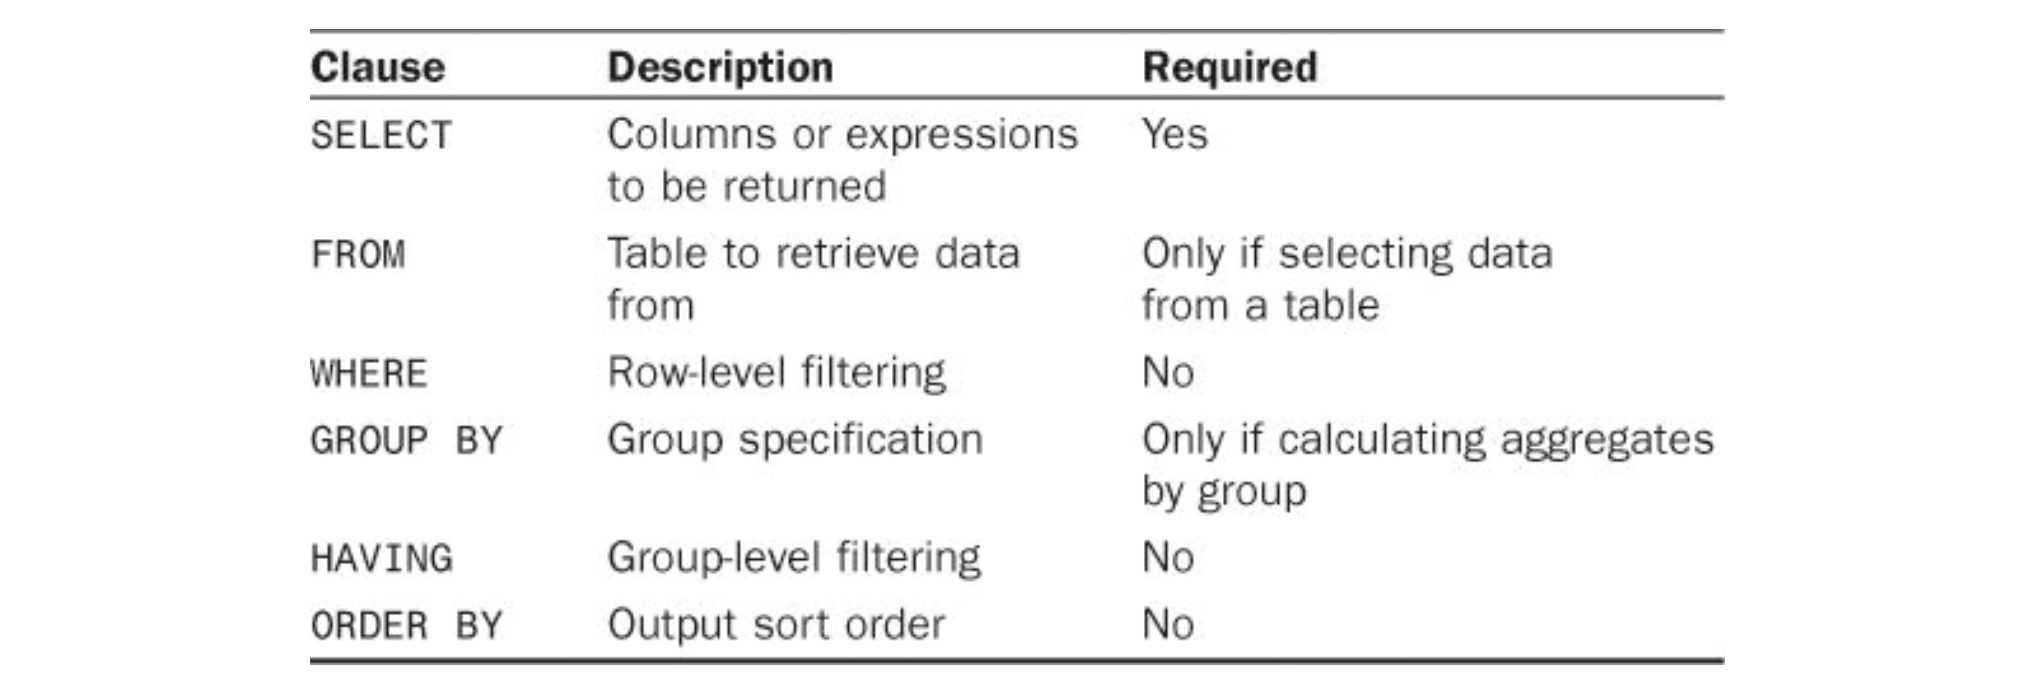

---

### 6.4.7 Working with Subqueries
<br>

* All the ```SELECT``` statements we have seen thus far are simple queries: single statements retrieving data from **individual database tables**. <br>
<br>
* Subqueries: queries that are embedded into other queries. <br>

Remember that we have two tables in the database, 'stock_returns' and 'value_signals'. Suppose that we want to select the stocks and their returns, whose values of 'be_me' are greater than 0.5 (in the table `value_signals`). How do you accomplish this objective? 

In [41]:
query = """
SELECT *
FROM stock_returns
WHERE key IN (SELECT key
              FROM value_signals
              WHERE be_me > 0.5);
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256, 310108801.0, '1990-07-31 00:00:00', -0.09400676194570491),
 (13581257, 310108801.0, '1990-08-31 00:00:00', -0.14569978347999013),
 (13581258, 310108801.0, '1990-09-30 00:00:00', 0.15107615827555618),
 (13581259, 310108801.0, '1990-10-31 00:00:00', 0.017782245901352873),
 (13581260, 310108801.0, '1990-11-30 00:00:00', 0.020162740476097583),
 (13581261, 310108801.0, '1990-12-31 00:00:00', 0.10634087906704814),
 (13581262, 310108801.0, '1991-01-31 00:00:00', 0.04320242424320072),
 (13581263, 310108801.0, '1991-02-28 00:00:00', 0.22126074089995698),
 (13581282, 310108801.0, '1992-09-30 00:00:00', 0.11850107442912107),
 (13581285, 310108801.0, '1992-12-31 00:00:00', 0.030780696856062193),
 (13581286, 310108801.0, '1993-01-31 00:00:00', 0.15227501574927174),
 (13581308, 310108801.0, '1994-11-30 00:00:00', -0.026606665663132145),
 (13581309, 310108801.0, '1994-12-31 00:00:00', -0.13705369159744468),
 (13581310, 310108801.0, '1995-01-31 00:00:00', 0.2307526166270138),
 (13581313, 3

**Caution: Single Column Only**

Subquery ```SELECT``` statements can only retrieve a single column. ***Attempting to retrieve multiple columns will return an error.***

In the following codes, you want to select 'be_me' from table 'value_signals' and select all variables from table 'stock_returns'. Clearly, this is not the most efficient way to write codes (and it takes an extremely long time to finish). 

```python
query = """
SELECT key,
       id, 
       eom, 
       ret_exc_lead1m, 
       (SELECT be_me 
        FROM value_signals
        WHERE value_signals.key = stock_returns.key) AS be_me 
FROM stock_returns
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()
```

**Caution: Subqueries and Performance**

The code shown above works, and it achieves the desired result. However, using subqueries is not always the most efficient way to perform this type of data retrieval. 

---

### 6.4.8 Joining Tables

**Caution: Fully Qualifying Column Names**

You must use the fully qualified column name (table and column separated by a period) whenever there is a possible ambiguity about which column you are referring to. Most DBMSs will return an error message if you refer to an ambiguous column name without fully qualifying it with a table name.

In [42]:
query = """
SELECT stock_returns.key,  -- try key
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns, value_signals
WHERE value_signals.key = stock_returns.key;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

The key step is to specify the ```WHERE``` clause: ```WHERE value_signals.key = stock_returns.key```. 

**Cartesian Product**

The results returned by a table relationship ***without a join condition***. The number of rows retrieved will be the number of rows in the first table multiplied by the number of rows in the second table. For instance, 
```python
query = """
SELECT stock_returns.key, 
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns, value_signals;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()
```

The above codes run super slowly. **Don’t Forget the WHERE Clause**. Make sure all your joins have ```WHERE``` clauses, or the DBMS will return far more data than you want. 

### ```INNER JOIN``` Command

In [43]:
query = """
SELECT stock_returns.key,  -- try key
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns INNER JOIN value_signals
 ON value_signals.key = stock_returns.key;   -- The same as the previous WHERE clause
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

**Joining Multiple Tables**

Suppose now that we want both the 'be_me' in table 'value_signals' and 'ret_12_1' in table 'momentum_signals'. 

In [44]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me, ret_12_1
FROM stock_returns, value_signals, momentum_signals
WHERE value_signals.key = stock_returns.key AND momentum_signals.key = stock_returns.key;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913,
  0.5973038530305139),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185,
  0.7201853732870784),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002,
  0.3588639104223419),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562,
  0.18273400231270576),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034,
  0.37187534934189204),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145,
  0.32642314414892537),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084,
  0.3037166018594679),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038,
  0.35399587272097865),
 (13581264,
  310108801.0,
  '19

In [45]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me, ret_12_1
FROM stock_returns, value_signals, momentum_signals
WHERE value_signals.key = stock_returns.key AND 
      momentum_signals.key = stock_returns.key AND
      ret_12_1 > 0.5 AND
      be_me > 0.5;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913,
  0.5973038530305139),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185,
  0.7201853732870784),
 (13581362,
  310108801.0,
  '1999-05-31 00:00:00',
  0.07771699877853348,
  0.5839675815721967,
  0.6937229388656563),
 (13581363,
  310108801.0,
  '1999-06-30 00:00:00',
  -0.01851511119712363,
  0.5398035544261716,
  0.7054208313774151),
 (13581364,
  310108801.0,
  '1999-07-31 00:00:00',
  -0.011669198971083105,
  0.5808633174543874,
  1.091749017581467),
 (13581365,
  310108801.0,
  '1999-08-31 00:00:00',
  -0.04477151297967834,
  0.5854256560749563,
  1.308454217629575),
 (13581366,
  310108801.0,
  '1999-09-30 00:00:00',
  0.09058308177518254,
  0.6104966235917361,
  0.9138689394146597),
 (13581370,
  310108801.0,
  '2000-01-31 00:00:00',
  0.04883753878457891,
  0.628948167993536,
  0.8651089384261121),
 (13581371,
  310108801.0,
  '2000-02

**Outer Joins**

Most joins relate rows in one table with rows in another. But occasionally, you want to include rows that have no related rows. 

In [46]:
query = """
SELECT stock_returns.key,  -- try key
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns LEFT OUTER JOIN value_signals
 ON value_signals.key = stock_returns.key;  
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

When using ```OUTER JOIN``` syntax you must use the ```RIGHT``` or ```LEFT``` keywords to specify the table from which to include all rows. 
* ```RIGHT``` for the one on the right of ```OUTER JOIN```, and ```LEFT``` for the one on the left. 
* The previous example uses ```LEFT OUTER JOIN``` to select all the rows from the table on the left in the ```FROM``` clause (the stock_returns table). <br>
* However, SQLite supports only ```LEFT OUTER JOIN```. If you want to use ```RIGHT OUTER JOIN```, you can swap the positions of two tables as follows:

In [47]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM value_signals LEFT OUTER JOIN stock_returns
 ON value_signals.key = stock_returns.key;  
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

---

### 6.4.9 Combining Queries

SQL enables us to perform multiple queries (multiple ```SELECT``` statements) and return the results as a single query result set. These combined queries are usually known as unions or compound queries. <br>
<br>

**Combining Queries vs Multiple ```WHERE``` Conditions**

For the most part, combining two queries to the same table accomplishes the same thing as a single query with multiple ```WHERE``` clause conditions. In other words, any ```SELECT``` statement with multiple ```WHERE``` clauses can also be specified as a combined query. <br>
<br>

**Using ```UNION```**

All you do is specify each ```SELECT``` statement and place the keyword ```UNION``` between each.

In [48]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m <= -0.1
UNION
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m >= 0.1   -- equivalent to WHERE ret_exc_lead1m <= -0.1 OR ret_exc_lead1m >= 0.1
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868261, 301393202.0, '2013-06-30 00:00:00', 0.13770149575689952),
 (12868269, 301393202.0, '2014-02-28 00:00:00', 0.12196186992849914),
 (12868274, 301393202.0, '2014-07-31 00:00:00', 0.10772963746354589),
 (12868278, 301393202.0, '2014-11-30 00:00:00', -0.10849568090873993),
 (12868281, 301393202.0, '2015-02-28 00:00:00', 0.10273350953682268),
 (12868291, 301393202.0, '2015-12-31 00:00:00', -0.14322808795861547),
 (12868292, 301393202.0, '2016-01-31 00:00:00', 0.13053403764101912),
 (12868293, 30139

**UNIONRules**

* A ```UNION``` must be composed of two or more ```SELECT``` statements, each separated by the keyword ```UNION``` (so, if combining four ```SELECT``` statements there would be three ```UNION``` keywords used).
* Each query in a ```UNION``` must contain the same columns, expressions, or aggregate functions.

---

### 6.4.10 Creating and Manipulating Tables

To create a table using ```CREATE TABLE```, you must specify the following information:
* The name of the new table specified after the keywords ```CREATE TABLE```. 
* The name and definition of the table columns separated by commas.

In [49]:
query = """
CREATE TABLE test_tables
(
    key    INT    PRIMARY KEY    NOT NULL, 
    id     REAL   NOT NULL, 
    firm_name   CHAR(254)    NOT NULL
)
"""

c.execute(query)

* The actual table definition (all the columns) is enclosed within parentheses.  <br>
<br>
* The columns themselves are separated by commas.  <br>
<br>
* This particular table is made up of three columns. Each column definition starts with the column name (which must be unique within the table), followed by the column’s datatype. 
  * More details about datatype: https://www.tutorialspoint.com/sqlite/sqlite_data_types.htm <br>
<br>
* You can also specify whether ```NULL``` values are allowed. 
  * ```NOT NULL``` prevents the insertion of columns with no value. If someone tries to insert no value, an error will be returned. 
  * ```NULL``` is the default setting, so if ```NOT NULL``` is not specified ```NULL``` is assumed.

**Caution: Understanding ```NULL```**

Don’t confuse ```NULL``` values with **empty strings**. A ```NULL``` value is the lack of a value; it is not an empty string. If you were to specify '' (two single quotes with nothing in between them), that would be allowed in a ```NOT NULL``` column. 
 * An empty string is a valid value; it is not no value. 
 * ```NULL``` values are specified with the keyword ```NULL```, not with an empty string.

In [50]:
query = """
PRAGMA table_info('test_tables')  -- Get the table information
"""

c.execute(query).fetchall()

[(0, 'key', 'INT', 1, None, 1),
 (1, 'id', 'REAL', 1, None, 0),
 (2, 'firm_name', 'CHAR(254)', 1, None, 0)]

**Specifying Default Values**

* SQL enables you to specify default values to be used if no value is specified when a row is inserted. 

* Default values are specified using the ```DEFAULT``` keyword. 

In [51]:
query = """
CREATE TABLE test_tables2
(
    key    INT    PRIMARY KEY    NOT NULL, 
    id     REAL   NOT NULL, 
    firm_name   CHAR(254)    NOT NULL   DEFAULT 'NO NAME'
)
"""

c.execute(query)

In [52]:
query = """
PRAGMA table_info('test_tables2')  -- Get the table information
"""

c.execute(query).fetchall()

[(0, 'key', 'INT', 1, None, 1),
 (1, 'id', 'REAL', 1, None, 0),
 (2, 'firm_name', 'CHAR(254)', 1, "'NO NAME'", 0)]

**Updating Tables**

To change a table using ```ALTER TABLE```, you must specify the following information:

* The name of the table to be altered after the keywords ```ALTER TABLE```. (The table must exist or an error will be generated.)
* The list of changes to be made.

In [53]:
query = """
ALTER TABLE test_tables
DROP COLUMN firm_name;
"""

c.execute(query)

query = """
PRAGMA table_info('test_tables')  -- Get the table information
"""

c.execute(query).fetchall()

[(0, 'key', 'INT', 1, None, 1), (1, 'id', 'REAL', 1, None, 0)]

**Deleting Tables**

In [54]:
query = """
DROP TABLE test_tables;
"""

c.execute(query)

In [55]:
query = """
DROP TABLE test_tables2;
"""

c.execute(query)

In [56]:
query = """
PRAGMA table_info('test_tables')  -- Get the table information
"""

c.execute(query).fetchall()

[]

In [57]:
query = """
PRAGMA table_info('test_tables2')  -- Get the table information
"""

c.execute(query).fetchall()

[]

---

### 6.4.10 Inserting Data

```INSERT``` is used to insert (add) rows to a database table. Insert can be used in several ways:
* Inserting a single complete row
* Inserting a single partial row
* Inserting the results of a query (from ```SELECT``` clause or copy the whole table)

Our lecture focuses on the **first two** ways. 

In [58]:
query = """
CREATE TABLE test_tables
(
    key    INT    PRIMARY KEY    NOT NULL, 
    id     REAL   NOT NULL, 
    firm_name   CHAR(254)   NULL  
)
"""

c.execute(query)

In [59]:
query = """
INSERT INTO test_tables (key, 
                         id, 
                         firm_name)
VALUES (
    9999999999,   -- key
    101010101,    -- id
    'Apple'       -- firm_name
);
"""

c.execute(query)

In [60]:
query = """
SELECT *
FROM test_tables;
"""

test_tables = c.execute(query)

test_tables.fetchall()

[(9999999999, 101010101.0, 'Apple')]

**Then, insert a few rows of data**

In [61]:
data = [(9999999997, 101010099.0, 'Google'), 
        (9999999996, 101010098.0, 'Meta'), 
        (9999999995, 101010097.0, 'Nvidia')]

query = """
INSERT INTO test_tables (key, 
                         id, 
                         firm_name)
VALUES (?, ?, ?);
"""

c.executemany(query, data)

In [62]:
query = """
SELECT *
FROM test_tables;
"""

test_tables = c.execute(query)

test_tables.fetchall()

[(9999999999, 101010101.0, 'Apple'),
 (9999999997, 101010099.0, 'Google'),
 (9999999996, 101010098.0, 'Meta'),
 (9999999995, 101010097.0, 'Nvidia')]

**Tip: Always Use a Columns List**

As a rule, never use ```INSERT``` without explicitly specifying the column list. This will greatly increase the probability that your SQL will continue to function in the event that table changes occur.

**Inserting Partial Rows**

You may omit columns from an ```INSERT``` operation if the table definition so allows. One of the following conditions must exist:
* The column is defined as allowing ```NULL``` values (no value at all).
* A default value is specified in the table definition. This means the default value will be used if no value is specified.

In [63]:
query = """
INSERT INTO test_tables (key, 
                         id)
VALUES (
    9999999998,   -- key
    101010100     -- id
);
"""

c.execute(query)

In [64]:
query = """
SELECT *
FROM test_tables;
"""

test_tables = c.execute(query)

test_tables.fetchall()

[(9999999999, 101010101.0, 'Apple'),
 (9999999997, 101010099.0, 'Google'),
 (9999999996, 101010098.0, 'Meta'),
 (9999999995, 101010097.0, 'Nvidia'),
 (9999999998, 101010100.0, None)]

---

### 6.4.11 Updating and Deleting Data

To update (modify) data in a table the ```UPDATE``` statement is used. The basic format of an ```UPDATE``` statement is made up of three parts:
* The table to be updated
* The column names and their new values
* The filter condition that determines which rows should be updated

In [65]:
query = """
UPDATE test_tables             -- The table to be updated
SET firm_name = "Microsoft"    -- The column names and their new values
WHERE key = 9999999998;        -- The filter condition that determines which rows should be updated
"""

c.execute(query)

In [66]:
query = """
SELECT *
FROM test_tables;
"""

test_tables = c.execute(query)

test_tables.fetchall()

[(9999999999, 101010101.0, 'Apple'),
 (9999999997, 101010099.0, 'Google'),
 (9999999996, 101010098.0, 'Meta'),
 (9999999995, 101010097.0, 'Nvidia'),
 (9999999998, 101010100.0, 'Microsoft')]

To delete (remove) data from a table, the ```DELETE``` statement is used.

In [67]:
query = """
DELETE FROM test_tables             
WHERE key = 9999999998;     
"""

c.execute(query)

In [68]:
query = """
SELECT *
FROM test_tables;
"""

test_tables = c.execute(query)

test_tables.fetchall()

[(9999999999, 101010101.0, 'Apple'),
 (9999999997, 101010099.0, 'Google'),
 (9999999996, 101010098.0, 'Meta'),
 (9999999995, 101010097.0, 'Nvidia')]

In [69]:
query = """
DROP TABLE test_tables;
"""

c.execute(query)

### Guidelines for Updating and Deleting Data

Don't omit the ```WHERE``` clause. If you omit it, the ```UPDATE``` or ```DELETE``` will be applied to every row in the table. 

Here are some important guidelines that many SQL programmers follow:
* Never execute an ```UPDATE``` or a ```DELETE``` without a ```WHERE``` clause unless you really do intend to update and delete every row.
* Make sure every table has a primary key, and use it as the ```WHERE``` clause whenever possible. 
* Before you use a ```WHERE``` clause with an ```UPDATE``` or a ```DELETE```, first test it with a ```SELECT``` to make sure it is filtering the right records.

---

## Finally, don't forget to close the connection!

In [70]:
conn.close()   # Don't forget to close the connection!

---

# END